Daniel Bourke, he recommended the site https://madewithml.com/ where he got hint to plot decision boundaries for classification.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

# **PyTorch Neural Network Classification**


## What is a classification problem?

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be **one of two options**, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be **one of more than two options** | Decide whether a photo of is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned **more than one option** | Predict what categories should be assigned to an article (e.g. mathematics, science & philosohpy). |


## What we're going to cover


| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Binary classification data** | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| **2. Classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. |
| **3. Fitting model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | We've trained an evaluated a model but it's not working, let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| **7. Replicating non-linear functions** | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| **8. Putting it all together ** | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |


# **Neural Network for Binary Classification Problem**
Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of input features | Same as binary classification |
| **Hidden layers** | Minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | [Several](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions), usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)) |
| **Loss function** | Binary cross entropy ([Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** |[`torch.optim`](https://pytorch.org/docs/stable/optim.html): [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the specific problem.

# **1. Make Classification Data**

We start by making some random data using the [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) method from Scikit-Learn library.

Let us generate two circles with different coloured dots.

In [38]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, noise=0.03, random_state=42)

In [39]:
len(X), len(y)

(1000, 1000)

In [40]:
print(f"Input (X):\n{X[:5]}")
print(f"\n Output (y):\n{y[:5]}")

Input (X):
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

 Output (y):
[1 1 1 1 0]


It seems that there's two input features (`X`) values per one output (`y`) value.
Let us put them into a `pandas` DataFrame.

In [41]:
circles_df = pd.DataFrame({"x1": X[:, 0],
                        "x2": X[:, 1],
                        "y": y})
circles_df.head(10)

,x1,x2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


Each pair of `X` features (`x1` and `x2`) has a label (`y`) value of either 0 or 1. Hence, the problem is **binary classification** since there are only two options (0 or 1).

How many values of each class is there? Let us check the frequency of the two labels.

In [42]:
circles_df.y.value_counts()

1    500
0    500
Name: y, dtype: int64

Each label has a frequency of 500. Balanced.

Let us plot for ease of visualization. In the below code snippet, the output `y` is used as the color argument for `c`, implying that the color of each point is determined by the labels in the `y` array, not the axis `y`. Different (in our case, 2) values (labels) in `y` will correspond to different colors on the scatter plot.
Also, in the `cmap` argument, `plt.cm.RdYlBu` is used as the color map (`cm`), which stands for Red-Yellow-Blue (`RdYlBu`) to assign different colors to different numerical values, creating a gradient effect.

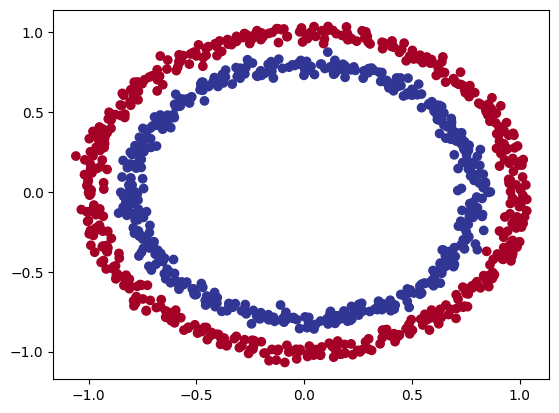

In [43]:
plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = plt.cm.RdYlBu);

Note that this dataset is often considered as a **toy problem**. In machine learning, a **toy problem** refers to a simplified and often contrived task or dataset that serves as a **learning exercise or illustration of a specific concept or algorithm**. Toy problems are designed to be **relatively simple** and **easy to understand**, allowing researchers and practitioners to **experiment**, **develop**, and **evaluate** new approaches, algorithms, or models without the complexity and constraints of real-world problems.


As a result, the above data can represent the major key of classification. And thus, we would like to build an NN model which is able to classify it (separate it into into red dot (0) or blue dot (1)).

## **1.1. Turn Data into Tensors**

Turn the NumPy arrays data into tensors which PyTorch prefers to work with.

In [44]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [45]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [46]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

## **1.2. Input and Output Shapes**

One of the most common errors in deep learning is **shape errors**.
Mismatching the shapes of tensors and tensor operations with result in errors in models. So the first question is "**What shapes are the inputs and the outputs?**"

In [47]:
print(f"Input shape: {X.shape}, Output shape: {y.shape}")

Input shape: torch.Size([1000, 2]), Output shape: torch.Size([1000])


In [48]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [49]:
y

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 

The first dimension of input and output shapes match. But what is the second dimension on `X`?

It often helps to view the values and shapes of a single example (features and labels). So let us view the first example of features and labels.

In [50]:
X_example = X[0]
y_example = y[0]
print(f"Example 1 of X: {X_example} and corresponding example of y: {y_example}")
print(f"Shapes example of X: {X_example.shape} and corresponding example of y: {y_example.shape}")

Example 1 of X: tensor([0.7542, 0.2315]) and corresponding example of y: 1.0
Shapes example of X: torch.Size([2]) and corresponding example of y: torch.Size([])


This tells the second dimension for `X` means there are two features where as `y` has a single feature (**scalar** - which has **no shape** for a single example label).

## **1.3. Create Train and Test Splits**

Now the data is in tensor format, let us split it into training and test sets. To do so, function [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from Scikit-Learn can be used.

Here, 80/20 ratio (80% training, 20% testing) is used and specified as in the argument `test_size = 0.2`. Since the split is done randomly, seed `random_state = 42` for reproducible split.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [52]:
type(X_train), X_train.dtype, y_train.dtype

(torch.Tensor, torch.float32, torch.float32)

Looks like there are 800 training examples and 200 testing examples.

# **2. Build Model**

It is time to build a model breaking it down into into a few parts:
1. Set up **device agnostic** code.
2. Create model by subclassing `nn.Module`.
3. Define loss function and optimizer.
4. Construct training loop.


## **2.1. Set Up Device Agnostic Code**

Based on the following code, the model can run on GPU if available else on CPU by default.

In [53]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **2.2. Build Model Subclassing `nn.Module`**

Given `X` (features), the model is expected to predict `y` (label), **supervised learning**.

Let us create a model class subclassing `nn.Module`:
1. Specify, say, 2 linear layers (number of layers is a hyperparameter) using `nn.Linear()` in the constructor considering the input `X` and output `y` shapes.
2. Define a `forward()` method for the forward pass computation of the model.

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # takes in 2 features (X), produces 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features, produces 1 feature (y)

  def forward(self, x):
    z = self.layer_1(x)  # Input goes through layer_1 - > first computation
    z = self.layer_2(z)  # first computation output goes through layer_2 -> second computation
    return z # computation goes through layer_1 first then its output goes through layer_2

Generally to benefits from speedups where possible instead of one by one saving of the computations, creating a model as follows is the same as above.


In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # takes in 2 features (X), produces 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features, produces 1 feature (y)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # computation goes through layer_1 first then its output goes through layer_2

What is going on here? There are two linear layers. The first `self.layer_1` takes 2 input features (`in_features = 2`) and produces 5 output features (`out_features = 5`). This is means 5 **hidden neurons (nodes or units)**. This layer turns the input data from having 2 features to 5 features. Why? This allows the model to learn patterns from 5 values rather than just 2 values, **potentially leading to better outputs** (potentially because sometimes it does not work).

The **number of hidden nodes** in neural network layers is a **hyperparameter** and there is **no set in stone value** every one has to use. The choice depends on the model type and dataset begin worked with. Here, since the dataset is small and simple, let us keep it small.

The second `self.layer_2` takes 5 hidden nodes (`in_features = 5`)  which are actually the outputs (`out_features = 5`) from `self.layer_1`. The only rule of hidden nodes is that the input nodes for the next layer (for us, `self.layer_2`) has be the same with output nodes (`out_features`) of the previous layer. Lasly, `self.layer_2` performs a linear combinations and turn it to `out_features = 1` (the same shape as `y`).

A visual example of what a similar classificiation neural network looks like [TensorFlow Playground website](https://playground.tensorflow.org/).*

### **2.2.1. Instantiate Model and Move to the Target Device**

Let us instantiate the model (create an instance of the model) and send it to the target `device`.

In [ ]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.5444,  0.2765],
                      [ 0.3238, -0.4332],
                      [ 0.1444, -0.2203],
                      [-0.3941, -0.6952],
                      [ 0.5504, -0.1536]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.4110, -0.1510,  0.6150,  0.5866,  0.0511], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.1625, -0.1811, -0.2776, -0.4086, -0.0900]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2022], device='cuda:0'))])

Note the first layer has $2\times 5=10$ weight parameters (`layer_1.weight`) and 5 biases `layer_1.bias` where as the second layer has $5$ weight parameters (`layer_1.weight`) and 5 biases `layer_1.bias`.

In [ ]:
device # target device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

We can also define the same model as above using [`nn.Sequential()`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) that performs performs a **forward pass** computation of the input data through the layers in their order of appearance. So let us now replicate `CircleModelV0` with `nn.Sequential()`.

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
    )

model_0.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

The definition using `nn.Sequential()` looks much simpler than subclassing `nn.Module`. It **always runs in sequential order** which is fantastic for straight-forward computations. But if other non-straight-forward sequential computations are needed, it is required to define a custom `nn.Module` subclass.

We can also use to define the model subclassing `nn.Module` and using `nn.Sequential()` as:

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 5),
        nn.Linear(in_features = 5, out_features = 1)
        )

  def forward(self, x):
    return self.model(x)


model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

### **2.2.2. Predictions With Untrained Model**

Now we have created a model, let us see what happens when we pass some data through it. Note to send the data to the target device.

In [ ]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0023],
        [-0.1345],
        [ 0.3244],
        [-0.0948],
        [ 0.2929],
        [ 0.2124],
        [-0.1349],
        [-0.0538],
        [ 0.3253],
        [-0.1437]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In the `.inference_mode()`, the gradient in the predictions goes away.

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0023],
        [-0.1345],
        [ 0.3244],
        [-0.0948],
        [ 0.2929],
        [ 0.2124],
        [-0.1349],
        [-0.0538],
        [ 0.3253],
        [-0.1437]], device='cuda:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


Note that here the predictions are continuous values including positive and negative values whereas the labels are discrete (particularly, 0 or 1).

What?.

#### **2.2.2.1. Predicted Output Values To Probabilities: Sigmoid Function**

Implementation of two linear layers of `nn.Linear()` internally calls the following equation:
$\mathbf{y} = \mathbf{x}\mathbf{W}^T  + \mathbf{b}$.
The predicted raw values (outputs) of this equation ($\hat{\mathbf{y}}$) can be interpreted as [logits](https://datascience.stackexchange.com/a/31045) which are a function of probabilities.
This means that the logits can be converted to probabilites using a transformation called [sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) activation function.

Let us try it out.

In [ ]:
with torch.inference_mode():
  y_pred_logits = model_0(X_test.to(device))

y_pred_probs = torch.sigmoid(y_pred_logits)

y_pred_logits[:10], y_pred_probs[:10]

(tensor([[-0.0023],
         [-0.1345],
         [ 0.3244],
         [-0.0948],
         [ 0.2929],
         [ 0.2124],
         [-0.1349],
         [-0.0538],
         [ 0.3253],
         [-0.1437]], device='cuda:0'),
 tensor([[0.4994],
         [0.4664],
         [0.5804],
         [0.4763],
         [0.5727],
         [0.5529],
         [0.4663],
         [0.4866],
         [0.5806],
         [0.4641]], device='cuda:0'))

#### **2.2.2.2. Predicted Probabilities To Labels: Dichotomization**

The predicted values are now in the form of **prediction probabilities** ([0,1])representing how much the model thinks the data point belongs to one class or another. Since we are dealing with binary classification, the ideal outputs are 0 or 1. So these values can be viewed as a decision boundary.
The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:
* If `y_pred_probs` >= 0.5, `y = 1` (class 1)
* If `y_pred_probs` < 0.5, `y = 0` (class 0)

To turn the prediction probabilities in prediction labels, we can simply round the outputs of the sigmoid activation function.

In [ ]:
y_preds = torch.round(y_pred_probs)
y_preds[:10]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0')

We can write the conversion from raw output values->probabilities->labels, can be all written in full in a single line as:

In [ ]:
with torch.inference_mode():
  y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
y_pred_labels[:10]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0')

We can check for the equality of the two. The function `torch.eq()` checks whether each of the corresponding values are equal.

In [ ]:
torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())==False

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [ ]:
torch.any(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())==False)

tensor(False, device='cuda:0')

Excellent! Now it looks like the model's predictions are in the same form as the truth labels (`y_test`).

In [ ]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

**Note**: The predicted raw output values (or probabilities or labels) are all of shape of `[200, 1]`. Hence squeezing is required to get rid of the extra dimension and use them for further computations.

In [ ]:
y_pred_probs.shape, y_pred_probs.shape, y_preds.shape

(torch.Size([200, 1]), torch.Size([200, 1]), torch.Size([200, 1]))

To recap, we have converted the model's predicted raw outputs (logits) to predicted probabilities using a **sigmoid activation function** only for binary classification. And then converted the prediction probabilities to prediction labels by rounding them.

For multi-class classification, there is another activation function called [softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).

### **2.2.3. Loss Function and Optimizer**

**Note:** Recall a **loss function** is what measures **how wrong the model predictions are**; the higher the loss, the worse the model. Different problems require different loss functions. For example, for a regression problem, the loss can be mean absolute error (MAE) or mean squared error (MSE).


For a binary classification problem, [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) loss function is used. There are two **binary cross entropy** implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - Same as above but has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) which makes more numerically stable.


Unlike the loss functions, the same optimizer function can often be used across different problem spaces. For example, stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) or Adam optimizer (`torch.optim.Adam()`) can be used for a range of problems.

Having the above concepts in mind, let us create a loss function and an optimizer.
We will use use a binary cross entropy loss function. And for the optimizer, we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

Note that the **sigmoid** activation function is used to make the predicted outputs same format as the true labels. However, the use of the sigmoid activation function is not required when passing the model's raw outputs to the `nn.BCEWithLogitsLoss` because it has a an already built-in sigmoid function.

### **2.2.4. Evaluation Metrics**



As a **loss** function measures **how wrong the model is**, an **evaluation metric** can be think of measuring **how right the model is**. Though both seem the same, **evaluation metrics** can be used to offer a different perspective on how the model is going.

Of the several evaluation metrics to be used for classification problems, let us consider **accuracy** (\% of correct predictions) here.

Let us write a function to do so.



In [88]:
def accuracy_metric(y_true, y_pred):
  correct_preds = torch.eq(y_true, y_pred).sum().item()
  return (correct_preds / len(y_pred)) * 100

We can now use this function whilst training the model to measure its performance alongside the loss.

### **2.2.5.  Train and Test Model**

Here is a reminder of the steps of training a model:

<details>
    <summary>Training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing the
            <code>forward()</code> function computations (<code>model(x_train)</code>).
        </li>
        <li><b>Loss calculation</b> - How wrong the model's predictions are compared to the ground truth (<code>loss = criterion(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - Optimizer's gradients are set to zero to avoid the default gridient accumulations (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Backward pass</b> - Computes the gradient of the loss wrt the parameters to be updated (each parameter
            with <code>requires_grad=True</code>). AKA <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step optimizer (gradient descent)</b> - Update parameters with <code>requires_grad=True</code>
            wrt the loss gradients to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>



In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = CircleModelV0().to(device)
# criterion = nn.BCELoss()            # Requires sigmoid on input
criterion = nn.BCEWithLogitsLoss()    # Not require sigmoid on input
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [ ]:
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(1, epochs + 1):
                                              # 1. Forward pass (model outputs raw logits)
  y_logits = model_0(X_train).squeeze()       # <-`squeeze` removes extra `1` dimension
  y_pred_probs = torch.sigmoid(y_logits)      # <- turn logits to pred probs
  y_pred = torch.round(y_pred_probs)          # <- turn pred probs to pred labels
                                              # 2. Calculate loss and (or accuracy)
  # loss = criterion(y_pred_probs, y_train)   # <- `criterion = nn.BCELoss` -> pred probabilities as inputs
  loss = criterion(y_logits, y_train)         # <- `criterion = nn.BCEWithLogitsLoss` -> pred logits as inputs
  accuracy = accuracy_metric(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()                       # 3. Optimizer zero grad
  loss.backward()                             # 4. Loss backwards
  optimizer.step()                            # 5. Optimizer step

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()                 # 1. Forward pass
    test_pred_probs = torch.sigmoid(test_logits)            # <- turn logits to pred probs
    test_pred = torch.round(test_pred_probs)                # <- turn pred probs to pred labels
                                                            # 2. Calculate loss and (or accuracy)
    # test_loss = criterion(test_pred_probs, y_test)        # <- If `criterion = nn.BCEWithLogitsLoss`
    test_loss = criterion(test_logits, y_test)              # <- If `criterion = nn.BCEWithLogitsLoss`
    test_acc = accuracy_metric(y_true = y_test, y_pred = test_pred)

  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_acc:.2f}%).")

Epoch: 10 | Loss (train, test): (0.69413, 0.69621)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 20 | Loss (train, test): (0.69346, 0.69587)| Accuracy (train, test): (46.00%, 47.00%).
Epoch: 30 | Loss (train, test): (0.69322, 0.69577)| Accuracy (train, test): (49.25%, 47.00%).
Epoch: 40 | Loss (train, test): (0.69313, 0.69573)| Accuracy (train, test): (49.12%, 46.50%).
Epoch: 50 | Loss (train, test): (0.69308, 0.69569)| Accuracy (train, test): (50.12%, 46.50%).
Epoch: 60 | Loss (train, test): (0.69306, 0.69565)| Accuracy (train, test): (50.25%, 46.50%).
Epoch: 70 | Loss (train, test): (0.69305, 0.69559)| Accuracy (train, test): (50.25%, 46.50%).
Epoch: 80 | Loss (train, test): (0.69304, 0.69554)| Accuracy (train, test): (50.75%, 46.50%).
Epoch: 90 | Loss (train, test): (0.69303, 0.69548)| Accuracy (train, test): (50.38%, 46.50%).
Epoch: 100 | Loss (train, test): (0.69302, 0.69543)| Accuracy (train, test): (50.50%, 46.50%).


Noticing the performance of the model, the results do not seem to have moved too much. Both the training and testing accuracy values barely moves above 50%. Because it is a class balanced (with 500 samples of class 0 and class 1) binary classification problem, the model is performing as good as random guessing (a model predicting class 1 every single time would achieve 50% accuracy).

### **2.2.6. Model Improvement**

**Visualization of Predictions**

To better understand why it looks like random guessing, let us make a visualization plot of the model's predictions. That is, let us see the decision boundary over the data to predict on.

To do so, following helper function (developed by Daniel Bourke, inspired by https://madewithml.com/) named called `plot_decision_boundary()`, which creates a NumPy meshgrid to visually plot the different points where the model is predicting certain classes, is used.

In [95]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
  ############### Put objects to CPU (works better with NumPy + Matplotlib)
  model.to("cpu")
  X, y = X.to("cpu"), y.to("cpu")

  ############### Setup prediction boundaries and grid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

  ############### Make features
  X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

  ############### Make predictions
  model.eval()
  with torch.inference_mode():
      y_logits = model(X_to_pred_on)

  ############### Adjust logits to prediction labels: multi-class or binary
  if len(torch.unique(y)) > 2:
      y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
  else:
      y_pred = torch.round(torch.sigmoid(y_logits))          # binary

  ############### Reshape preds and plot
  y_pred = y_pred.reshape(xx.shape).detach().numpy()
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Using the above function, the decision boundary plots for the training and test sets can be obtained running following code.

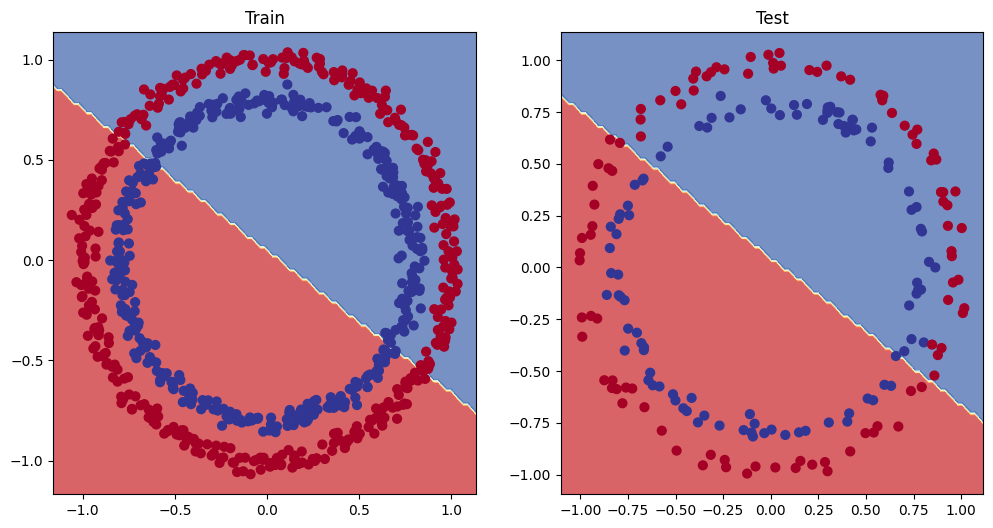

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

It seems like the cause of model's performance issue is the **linear decision boundary** that is trying to split the red and blue dots using a straight line... That explains the 50% accuracy. Since the data is circular, drawing a straight line can at best cut it down the middle.

In such cases, the model is **underfitting** in machine learning, meaning it is **not learning predictive patterns** from the data.

How could the performance be improved?

**Solving Underfitting**

Some of the few ways of improving the model (not the data) are:

| Technique* | What does it do? |
| ----- | ----- |
| **Adding layers** | Each layer **potentially** increases the learning capabilities of the model, more layers is often referred to as making the NN **deeper**. |
| **More hidden units** | More hidden units per layer (making the NN **wider**) means a **potential** increase in learning capabilities of the model. |
| **Longer training period** | The model might learn more if it had more opportunities to look at the data. |
| **Changing activation functions** | Straight lines (like what we have seen) will not fit to most data, using non-linear activation functions can help with this (hint, hint). |
| **Change learning rate** | Too much leads the model overcorrects, and too little makes the model doesnot learn enough. |
| **Change loss function** | Different problems require different loss functions. |
| **Use transfer learning** | Take a pretrained model of a similar problem domain and adjust it to own problem.

> **Note:** *because we can adjust all of these as ML engineers of data scientists, they're referred to as **hyperparameters**. There is no real way to know what the best combination of values of the hyperparameters for a particular project. Best to follow the data scientist's motto of "experiment, experiment, experiment".

Let's see what happens if we add an extra layer to our model, fit for longer (`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.

Follow the same steps we did above but with a few changed hyperparameters.

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10) # extra layer
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653],
                      [ 0.1282, -0.2518],
                      [ 0.3691,  0.3716],
                      [ 0.2644, -0.1243],
                      [-0.1872,  0.0756],
                      [-0.1249, -0.2107]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.4520,  0.6077, -0.0700, -0.1583,  0.0103, -0.0422,  0.1700,  0.1982,
                      -0.6422, -0.2609], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2663,  0.1232, -0.0157, -0.1907, -0.1935, -0.2833, -0.1031,  0.1068,
                        0.2016,  0.1460],
                      [-0.2795, -0.1902, -0.0499,  0.3059,  0.0457, -0.0819,  0.1308, -0.1204,
                       -0.2047,  0.2308],
                      [-0.1438, -0.063

Now we have a model with an extra layer and increased hidden nodes. Using similar loss function and optimizer as before, but with(`epochs=1000` vs `epochs=100`) training period, let us see if the model performance improves.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = CircleModelV1().to(device)
# criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [ ]:
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(1, epochs + 1):
                                              # 1. Forward pass (model outputs raw logits)
  y_logits = model_1(X_train).squeeze()       # <-`squeeze` removes extra `1` dimension
  y_pred_probs = torch.sigmoid(y_logits)      # <- turn logits to pred probs
  y_pred = torch.round(y_pred_probs)          # <- turn pred probs to pred labels
                                              # 2. Calculate loss and (or accuracy)
  # loss = criterion(y_pred_probs, y_train)   # <- `criterion = nn.BCELoss` -> pred probabilities as inputs
  loss = criterion(y_logits, y_train)         # <- `criterion = nn.BCEWithLogitsLoss` -> pred logits as inputs
  accuracy = accuracy_metric(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()                       # 3. Optimizer zero grad
  loss.backward()                             # 4. Loss backwards
  optimizer.step()                            # 5. Optimizer step

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()                 # 1. Forward pass
    test_pred_probs = torch.sigmoid(test_logits)            # <- turn logits to pred probs
    test_pred = torch.round(test_pred_probs)                # <- turn pred probs to pred labels
                                                            # 2. Calculate loss and (or accuracy)
    # test_loss = criterion(test_pred_probs, y_test)        # <- If `criterion = nn.BCEWithLogitsLoss`
    test_loss = criterion(test_logits, y_test)              # <- If `criterion = nn.BCEWithLogitsLoss`
    test_acc = accuracy_metric(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_acc:.2f}%).")

Epoch: 100 | Loss (train, test): (0.69305, 0.69378)| Accuracy (train, test): (50.62%, 49.00%).
Epoch: 200 | Loss (train, test): (0.69299, 0.69437)| Accuracy (train, test): (51.12%, 46.00%).
Epoch: 300 | Loss (train, test): (0.69298, 0.69458)| Accuracy (train, test): (51.62%, 45.00%).
Epoch: 400 | Loss (train, test): (0.69298, 0.69464)| Accuracy (train, test): (51.12%, 46.00%).
Epoch: 500 | Loss (train, test): (0.69298, 0.69467)| Accuracy (train, test): (51.00%, 46.00%).
Epoch: 600 | Loss (train, test): (0.69298, 0.69468)| Accuracy (train, test): (51.00%, 46.00%).
Epoch: 700 | Loss (train, test): (0.69298, 0.69468)| Accuracy (train, test): (51.00%, 46.00%).
Epoch: 800 | Loss (train, test): (0.69298, 0.69468)| Accuracy (train, test): (51.00%, 46.00%).
Epoch: 900 | Loss (train, test): (0.69298, 0.69468)| Accuracy (train, test): (51.00%, 46.00%).
Epoch: 1000 | Loss (train, test): (0.69298, 0.69468)| Accuracy (train, test): (51.00%, 46.00%).


The model is trained for longer and with an extra layer but it still looks like it does not learn any patterns better than random guessing.

Let us visualize again.

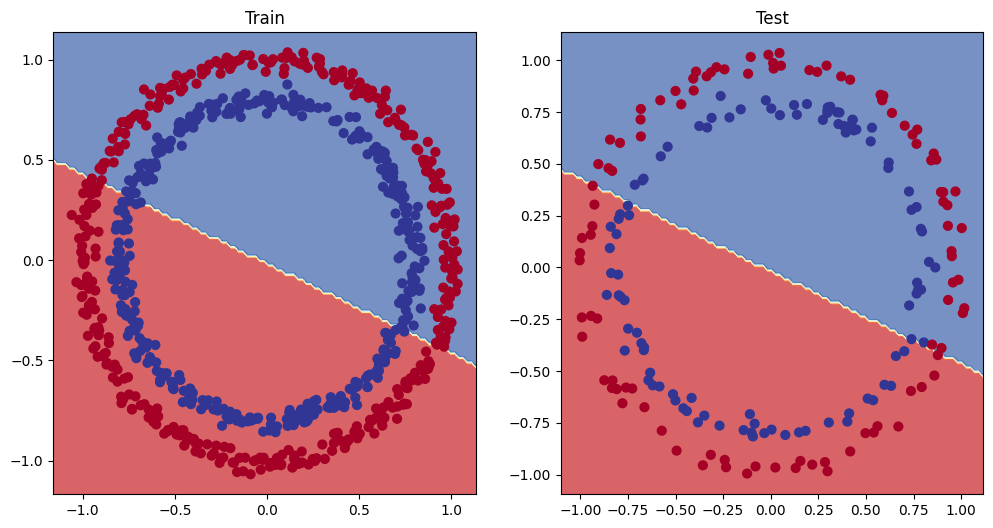

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

The model is still drawing a straight line between the red and blue dots.

# **3. The Missing Piece: Non-Linearity** to be included in code 01 with linear reg

So far we have seen the neural network models using **only linear (straight) lines (functions)**, thanks to the linear layers in PyTorch.
But how about we give it the capacity to draw **non-straight (non-linear) lines**? What patterns could we draw if we are given with an infinite (but really, it is finite) number of a straight and non-straight lines (functions)? Let us find out.

The data we have been working with is **non-linear (circular)**.



## **3.1. Building a Classification Model with Non-Linearity**

One of the most common and best performing activation function is [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).

Following code applies intersperse ReLU between the layers as shown in the `forward()` method. However, the output of the instantiated model does not let us know where the activation function is applied.

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() # <- ReLU activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2().to(device)
print(model_2)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


We can also see the parameters:

In [ ]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984])),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01,  5.6581e-02,  5.3486e-01, -1.927

Not that the activation function has no parameters.

What about if we want to use `torch.nn.sequential()` function:

In [ ]:
model_3 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1),
    nn.ReLU()
    ).to(device)
print(model_3)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): ReLU()
)


ReLU is applied only on the output of the final layer (layer 3); that is, it results `ReLU(layer_3(layer_2(layer_1(x))))`.

To get the architecture of the first model (`m_1`), we can write in the sequential model as follows:

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 10),
    nn.ReLU(),
    nn.Linear(in_features = 10, out_features = 10),
    nn.ReLU(),
    nn.Linear(in_features = 10, out_features = 1),
    nn.ReLU()
    ).to(device)
print(model_2)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): ReLU()
)


But **where should the non-linear activation functions put when constructing a neural network**?
A rule of thumb is to put them in between hidden layers and just after the output layer, however, there is **no set in stone option**. So, best to experiment, experiment, experiment.

**Train and Test Model With Non-Linearity**

Now let us create a binary classification loss function (`nn.BCEWithLogitsLoss()`) as well as an optimizer (`torch.optim.SGD(model_3.parameters(), lr = 0.1)`) for `model_3`.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = CircleModelV2().to(device)
print(model_2)
# criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(1, epochs + 1):
                                              # 1. Forward pass (model outputs raw logits)
  y_logits = model_2(X_train).squeeze()       # <-`squeeze` removes extra `1` dimension
  y_pred_probs = torch.sigmoid(y_logits)      # <- turn logits to pred probs
  y_pred = torch.round(y_pred_probs)          # <- turn pred probs to pred labels
                                              # 2. Calculate loss and (or accuracy)
  # loss = criterion(y_pred_probs, y_train)   # <- `criterion = nn.BCELoss` -> pred probabilities as inputs
  loss = criterion(y_logits, y_train)         # <- `criterion = nn.BCEWithLogitsLoss` -> pred logits as inputs
  accuracy = accuracy_metric(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()                       # 3. Optimizer zero grad
  loss.backward()                             # 4. Loss backwards
  optimizer.step()                            # 5. Optimizer step

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()                 # 1. Forward pass
    test_pred_probs = torch.sigmoid(test_logits)            # <- turn logits to pred probs
    test_pred = torch.round(test_pred_probs)                # <- turn pred probs to pred labels
                                                            # 2. Calculate loss and (or accuracy)
    # test_loss = criterion(test_pred_probs, y_test)        # <- If `criterion = nn.BCEWithLogitsLoss`
    test_loss = criterion(test_logits, y_test)              # <- If `criterion = nn.BCEWithLogitsLoss`
    test_accuracy = accuracy_metric(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_accuracy:.2f}%).")

Epoch: 100 | Loss (train, test): (0.69117, 0.69104)| Accuracy (train, test): (53.00%, 52.50%).
Epoch: 200 | Loss (train, test): (0.68979, 0.68941)| Accuracy (train, test): (53.37%, 55.00%).
Epoch: 300 | Loss (train, test): (0.68797, 0.68726)| Accuracy (train, test): (53.00%, 56.00%).
Epoch: 400 | Loss (train, test): (0.68520, 0.68415)| Accuracy (train, test): (52.75%, 56.50%).
Epoch: 500 | Loss (train, test): (0.68107, 0.67947)| Accuracy (train, test): (52.75%, 56.50%).
Epoch: 600 | Loss (train, test): (0.67522, 0.67293)| Accuracy (train, test): (54.37%, 56.00%).
Epoch: 700 | Loss (train, test): (0.66670, 0.66333)| Accuracy (train, test): (58.38%, 59.00%).
Epoch: 800 | Loss (train, test): (0.65179, 0.64776)| Accuracy (train, test): (64.00%, 67.50%).
Epoch: 900 | Loss (train, test): (0.62401, 0.62180)| Accuracy (train, test): (74.00%, 78.50%).
Epoch: 1000 | Loss (train, test): (0.56890, 0.57440)| Accuracy (train, test): (87.62%, 86.50%).


That is looking better!

## **3.2. Evaluating Model Trained with Activation Function**

Remember how the circle data is non-linear? Well, let us see how the model predictions look now when the model has been trained with non-linear activation functions.

In [ ]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

Let us compare the visualization plots decision boundaries for training and test sets.

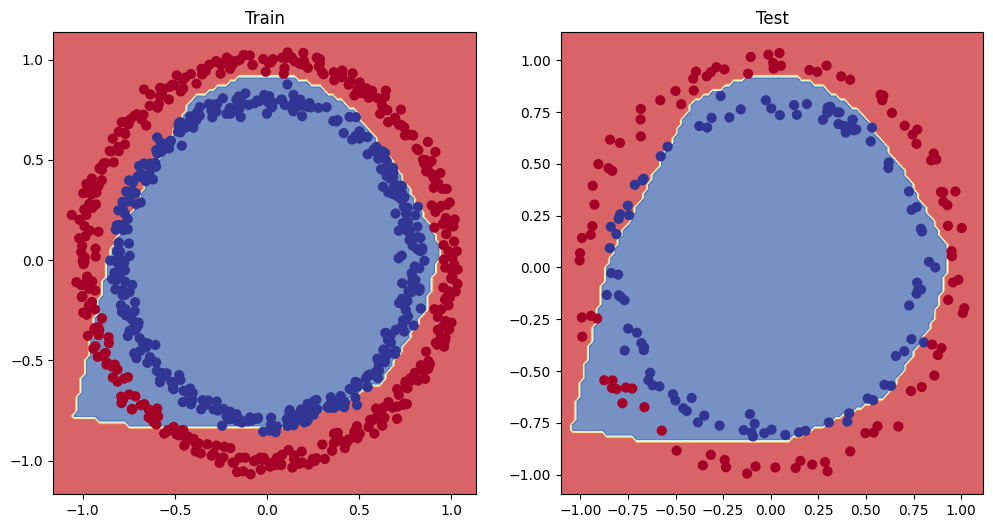

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

The model with the ReLU activation function is by far far better the one with no activation function.

Now let us compare the visualizations of the linear and non-linear models.

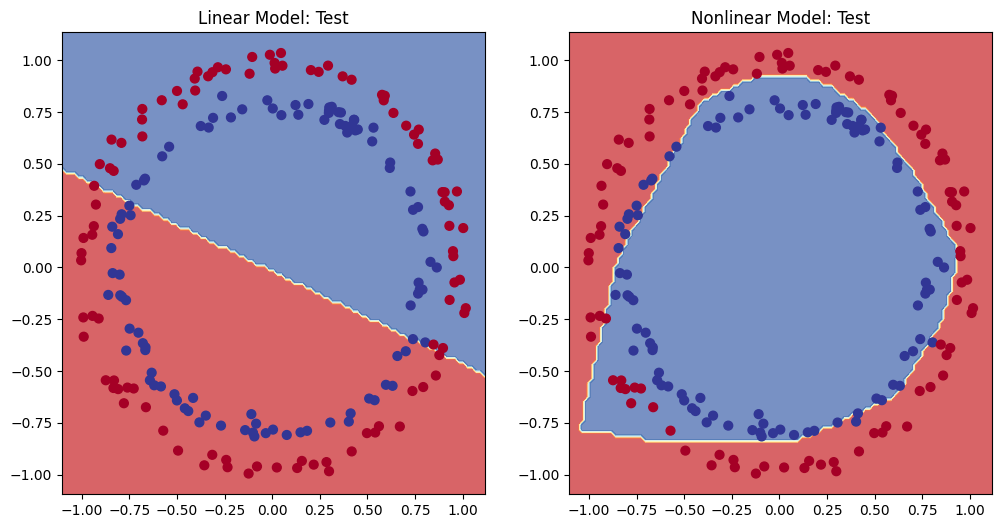

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Linear Model: Test")
plot_decision_boundary(model_1, X_test, y_test) # model_1 = no non-linearity

plt.subplot(1, 2, 2)
plt.title("Nonlinear Model: Test")
plot_decision_boundary(model_2, X_test, y_test)  # model_2 = has non-linearity

Potentially we could try a few tricks to improve the test accuracy of the model:
* change **learning rate**
* increase number of **hidden nodes**
* add **more layers**
* **train for longer**
* change **activation function**
* change **loss** function


# **Neural Network for Multi-Class Classification Problems**
**I will separate it, NN for Multi-Class Problems independent of the binary**

Recall a **binary classification** problem deals with classifying in **one of two options** (e.g.; a photo: a cat, or a dog; email: spam or not spam) where as a **multi-class classification** problem deals with classifying in **one of more than two options** (e.g.; classifying a photo: cat, dog, or chicken; email: spam, primary, promotion, social, updates, forums).

![binary vs multi-class classification image with the example of dog vs cat for binary classification and dog vs cat vs chicken for multi-class classification](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-binary-vs-multi-class-classification.png)


Now let us put it all together using a multi-class classification problem.

In [54]:
# Dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# **1. Mutli-class Classification Data**

To begin a multi-class classification problem, let us create some multi-class data:

1. Create some multi-class data with [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) method from Scikit-Learn's Library.
2. Turn the data into tensors (the default of `make_blobs()` is to use `NumPy` arrays).
3. Split the data into training and test sets using `train_test_split()`.
4. Visualize the data.


In the code below, `cluster_std` gives the clusters a little shake up (default = 1, try and see the change). In other words, it is the standard deviation of the observations within a class. Set it to 0 and observe the difference.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


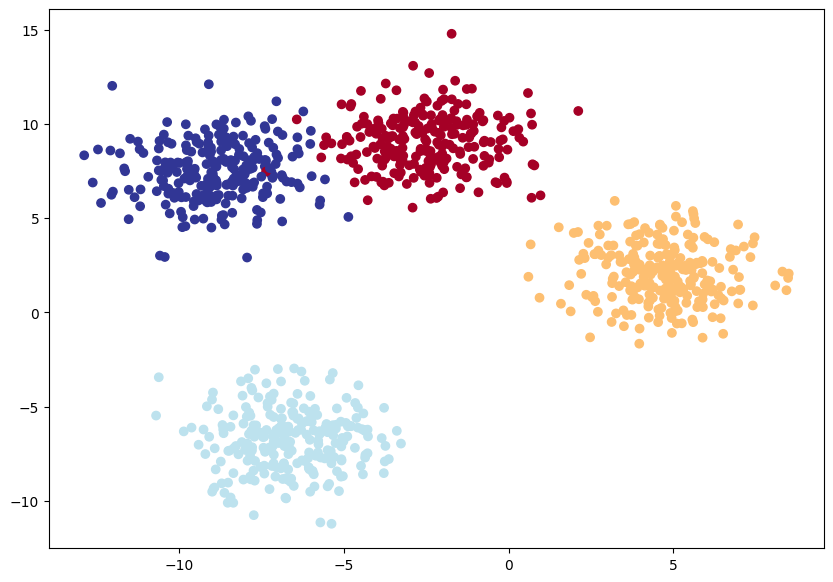

In [55]:
# Hyperparameters settings
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Multi-class data creation
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED
                            )

# 2. Turn into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) # Target 'must' be long (see note below)
print(X_blob[:5], y_blob[:5])

# 3. Train and test splits
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED
                                                                        )

# 4. Plot data
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[ : , 0], X_blob[ : , 1], c = y_blob, cmap = plt.cm.RdYlBu);

Does this dataset need non-linearity? Or could we draw a succession of straight lines to separate it?

**Note-Note-Note**: So far we have been specifying the data types to be float.
>  But in the above code, the target data type should be **long, not float**. If it is float the loss calculation during training will raise an error.

> Daniel says that he got hint from the [cross entropy loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) documentation of PyTorch. It is put as a NOTE there: "The performance of this criterion is generally better when '**target** contains **class indices**' as this allows for optimized computation. Consider providing **target** as class probabilities only when a single class label per minibatch item is too restrictive." (single quotes Daniel assumption of hint). And in the examples, it has been used as: `target = torch.empty(3, dtype=torch.long).random_(5)`.

# **2. Build Multi-Class Classification Model**

How can we build a model similar to `model_3` but capable of handling multi-class data?

To do so, let's create a subclass of `nn.Module` that takes in three hyperparameters:
* `input_features` - the number of `X` features coming to the model.
* `output_features` - the numbers of output `y` features of the model (this will be equivalent to `NUM_CLASSES`).
* `hidden_units` - the number of hidden neurons in each hidden layer.

As usuall, let us setup the device agnostic code.

In [73]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [66]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does the dataset require non-linear layers? (comment and see if results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does the dataset require non-linear layers? (comment and see if results change)
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.layers_stack(x)

# Create an instance of BlobModel and send it to the target device
model_3 = BlobModel(input_features = NUM_FEATURES,
                    output_features = NUM_CLASSES,
                    hidden_units = 8).to(device)
model_3

BlobModel(
  (layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

The multi-class model is now ready to perform a single forward pass on the data.

In [67]:
next(model_3.parameters()).device, X_blob_train.device

(device(type='cuda', index=0), device(type='cpu'))

In [76]:
X_blob_train = X_blob_train.to(device) # Why?
X_blob_train.device

device(type='cuda', index=0)

# **3. Prediction Outputs of Multi-Class Model**

Let us examine the prediction outputs of the model.

In [77]:
with torch.inference_mode():
  y_preds = model_3(X_blob_train)
y_preds[:10]

tensor([[-0.9482, -0.3343,  0.4843, -0.3395],
        [-0.9449, -0.3606,  0.5053, -0.3312],
        [-1.6196, -0.0311,  0.2611, -0.9777],
        [-1.1659, -0.1045,  0.2172, -0.6578],
        [-0.6057, -0.2806,  0.2884, -0.2981],
        [-1.1782, -0.4180,  0.6416, -0.3578],
        [-0.7832, -0.2747,  0.3942, -0.3548],
        [-0.7672, -0.3299,  0.3872, -0.2927],
        [-1.0633, -0.1631,  0.2137, -0.4046],
        [-0.6885, -0.2788,  0.3412, -0.3236]], device='cuda:0')

What is coming out here? It looks like we get one value per feature of each sample. How many elements in a single prediction sample? Let us check the shape to confirm.

In [79]:
y_preds.shape, NUM_CLASSES

(torch.Size([800, 4]), 4)

Wonderful, the model is predicting one value for each class that we have.

Do you remember what the **raw outputs of the binary classification model** are called? Hoped you guessed **logits**. So the model can be considered as outputing logits. But how can we figure out exactly to **which class each sample belongs**?

To do so, we have to go from `predicted raw outputs (logits) -> predicted probabilities -> predicted classes` just like we did with the binary classification problem. This is where the [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) comes into play which calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

If this doesn't make sense, let's see in code.

In [83]:
with torch.inference_mode():
  y_pred_logits = model_3(X_blob_test.to(device))


y_pred_probs = torch.softmax(y_pred_logits, dim = 1) # softmax calculation across dimension 1
print(y_pred_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.0810, -0.3251,  0.5513, -0.3889],
        [-1.0626, -0.1700,  0.2147, -0.3748],
        [-1.3031, -0.0727,  0.2290, -0.7960],
        [-0.6051, -0.3633,  0.2805, -0.2243],
        [-1.3389, -0.4344,  0.7286, -0.3941]], device='cuda:0')
tensor([[0.0976, 0.2079, 0.4994, 0.1951],
        [0.1109, 0.2707, 0.3978, 0.2206],
        [0.0934, 0.3195, 0.4321, 0.1550],
        [0.1623, 0.2067, 0.3935, 0.2375],
        [0.0717, 0.1771, 0.5668, 0.1844]], device='cuda:0')


After passing the logits through the softmax function, each individual sample now adds to 1 (or very close to).

In [84]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

These prediction probablities are essentially saying how much the model thinks the target `X` sample (the input) maps to each class.

Since there is one value for each class in `y_pred_probs`, the **index of the highest value** is the class the model thinks the specific data sample **most belongs to**.

We can check which index has the highest value using `torch.argmax()`.

In [85]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.0976, 0.2079, 0.4994, 0.1951], device='cuda:0')
tensor(2, device='cuda:0')


You can see the output of `torch.argmax()` returns index 2 (the 3rd class), so for the features (`X`) of the sample at index 0, the model is predicting that the most likely class value (`y`) is 3.

Of course, right now this is just random guessing. But we can improve those chances by training the model.

In [86]:
y_pred_class = torch.argmax(y_pred_probs, dim = 1) # argmax calculation across dimension 1
y_pred_class, y_blob_test

(tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 

To summarize the above, a multi-class classification model's raw output is referred to as **logits** that can be turned into **prediction probabilities** using softmax activation function (`torch.softmax()`). The index with the highest **prediction probability** is an indicator of the **most likely** class given the input features (provided that it does not mean it is always correct).

> **Note:** It is possible to skip the `torch.softmax()` function and go straight from `predicted logits -> predicted labels` by calling `torch.argmax()` directly on the logits (`y_preds = torch.argmax(y_logits, dim=1)`). It saves **saves a computation step** (no `torch.softmax()`). However the exponentiation of the logits in the softmax function can help for **numerical stability**, especially when dealing with large or small values. As a result, softmax helps in **stabilizing the computation** and **maintaining a valid probability distribution**.

# **4. Training and Testing Multi-Class Model**

For a multi-class classification problem, the `nn.CrossEntropyLoss()` method is used as a **loss** function. The other difference compared to the binary classification model is the conversion of the model outputs (logits) to prediction probabilities using **softmax** activation function and then to prediction labels by taking the argmax of the prediction probabilities.

Let's train the model for `epochs=100` and evaluate it every 10 epochs.

In [89]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.1)

for epoch in range(1, epochs + 1):
  y_pred_logits = model_3(X_blob_train)             # 1. Forward pass
  y_pred_labels = torch.softmax(y_pred_logits, dim=1).argmax(dim=1)

  loss = criterion(y_pred_logits, y_blob_train)     # 2. Loss fuction | ( Loss fuction & accuracy)
  accuracy = accuracy_metric(y_true=y_blob_train, y_pred=y_pred_labels)
  optimizer.zero_grad()                             # 3. Optimizer zero grad
  loss.backward()                                   # 4. Loss backwards
  optimizer.step()                                  # 5. Optimizer step

  model_3.eval()
  with torch.inference_mode():
    test_pred_logits = model_3(X_blob_test)              # 1. Forward pass
    test_pred_labels = torch.softmax(test_pred_logits, dim=1).argmax(dim=1)
    test_loss = criterion(test_pred_logits, y_blob_test) # 2. Loss fuction | ( Loss fuction & accuracy)
    test_accuracy = accuracy_metric(y_true = y_blob_test, y_pred = test_pred_labels)

  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_accuracy:.2f}%).")

Epoch: 10 | Loss (train, test): (0.79798, 0.76296)| Accuracy (train, test): (70.62%, 74.50%).
Epoch: 20 | Loss (train, test): (0.51174, 0.48238)| Accuracy (train, test): (76.62%, 78.50%).
Epoch: 30 | Loss (train, test): (0.38558, 0.35937)| Accuracy (train, test): (83.38%, 86.50%).
Epoch: 40 | Loss (train, test): (0.31894, 0.29497)| Accuracy (train, test): (88.50%, 91.00%).
Epoch: 50 | Loss (train, test): (0.27436, 0.25206)| Accuracy (train, test): (92.38%, 94.00%).
Epoch: 60 | Loss (train, test): (0.23759, 0.21662)| Accuracy (train, test): (95.00%, 95.00%).
Epoch: 70 | Loss (train, test): (0.19391, 0.17128)| Accuracy (train, test): (96.25%, 96.00%).
Epoch: 80 | Loss (train, test): (0.12629, 0.10678)| Accuracy (train, test): (98.12%, 99.00%).
Epoch: 90 | Loss (train, test): (0.08133, 0.06896)| Accuracy (train, test): (98.88%, 99.00%).
Epoch: 100 | Loss (train, test): (0.06154, 0.05175)| Accuracy (train, test): (99.00%, 99.00%).


It looks like the trained model is performaning pretty well.

**Note-Note-Note** (again): So far we have been specifying the data types to be float.
> But in the above code, the target data type should be **long, not float**. If it is float the loss calculation during training will raise an error. Daniel says that he gat hint from the [cross entropy loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) documentation of PyTorch. It is put as a NOTE there: "The performance of this criterion is generally better when '**target** contains class indices' as this allows for optimized computation. Consider providing **target** as class probabilities only when a single class label per minibatch item is too restrictive." (single quotes Daniel assumption of hint). And in the examples, it has been used as: `target = torch.empty(3, dtype=torch.long).random_(5)`.

# **5. Evaluation of Multi-Class Model via Visualization of Predictions**

But to make sure of the performance of the model, let us make some predictions and visualize them.

View the first 10 predictions:

In [90]:
with torch.inference_mode():
    y_pred_logits = model_3(X_blob_test)

y_pred_logits[:10]

tensor([[ 4.2545,  8.8145, -5.5850, -9.4935],
        [ 0.8021, -7.5529, -2.6509,  4.5040],
        [-2.9778, -4.7491,  5.3562, -4.1465],
        [ 3.3584,  6.4838, -4.2807, -7.2211],
        [ 2.8466,  0.5375, -3.8637, -2.5420],
        [ 0.7714, -8.9972, -3.0444,  5.4510],
        [-2.9193, -3.2313,  5.5516, -4.9374],
        [ 2.6287, -1.4043, -3.6442, -0.9820],
        [-3.3663, -7.0459,  5.4488, -3.3530],
        [ 2.6644, -0.7158, -3.6537, -1.5089]], device='cuda:0')

Convert model's prediction logits to prediction probabilities (using `torch.softmax()`) of each sample.

Then compare max of prediction probabilities with the actual labels by inspection.

In [91]:
y_pred_probs = torch.softmax(y_pred_logits, dim=1)
y_pred_probs[:10], y_blob_test[:10]

(tensor([[1.0353e-02, 9.8965e-01, 5.5190e-07, 1.1077e-08],
         [2.4063e-02, 5.6599e-06, 7.6161e-04, 9.7517e-01],
         [2.4013e-04, 4.0850e-05, 9.9964e-01, 7.4627e-05],
         [4.2071e-02, 9.5791e-01, 2.0248e-05, 1.0699e-06],
         [9.0487e-01, 8.9895e-02, 1.1024e-03, 4.1339e-03],
         [9.1957e-03, 5.2616e-07, 2.0249e-04, 9.9060e-01],
         [2.0940e-04, 1.5328e-04, 9.9961e-01, 2.7833e-05],
         [9.5544e-01, 1.6932e-02, 1.8027e-03, 2.5829e-02],
         [1.4843e-04, 3.7454e-06, 9.9970e-01, 1.5042e-04],
         [9.5125e-01, 3.2384e-02, 1.7154e-03, 1.4651e-02]], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

Convert prediction probabilities to prediction labels (by taking the `argmax()` of each sample).

In [92]:
y_pred_labels = y_pred_probs.argmax(dim=1)
y_pred_labels[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

Compare first 10 model preds and test labels.

In [93]:
print(f"Predictions: {y_pred_labels[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_metric(y_true=y_blob_test, y_pred=y_pred_labels)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.0%


Let us visualize the class labels together with the decision boundaries with `plot_decision_boundary()`. Remember if data is on the GPU, it has to be moved to CPU for use with the plot of `matplotlib`.

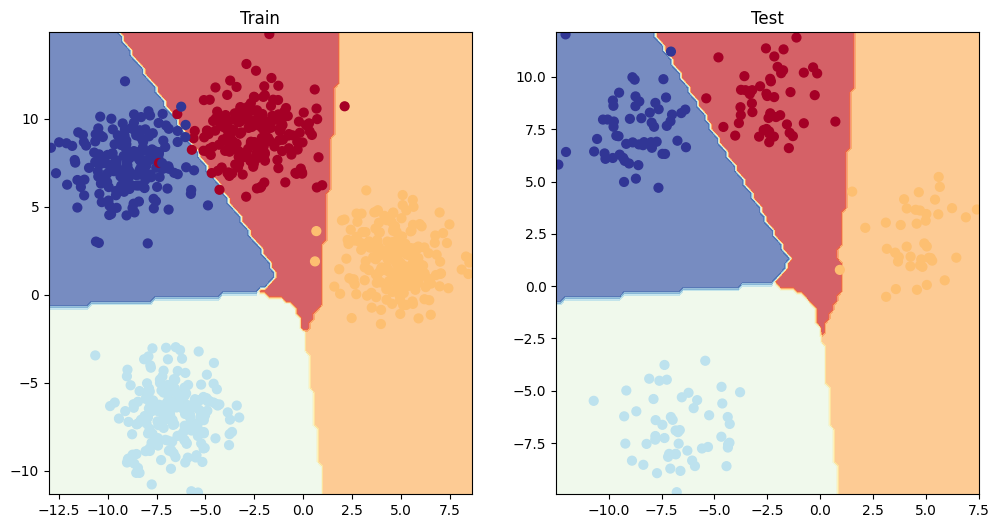

In [96]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.title("Train")
plot_decision_boundary(model_3, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_blob_test, y_blob_test)

If you re-run the model, commenting the ReLU activation functions, it still works, and the lines become more straight. This indicates that the data is linearly separable which is not common in real world applications.

# **6. More Classification Evaluation Metrics**

Scikit-Learn (a popular and world-class machine learning library) has many implementations of classification metrics and we are next looking for a PyTorch-like version called [torchmetrics](https://torchmetrics.readthedocs.io/en/latest/).


| **Metric** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Proportion of correct predictions; $P(\hat{y}=1|y=1)+P(\hat{y}=0|y=0)$ (for balanced classes). | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3) or [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) |
| Precision | Proportion of TPs over total number of samples; $P(\hat{y}=1|y=0)$. | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4) or [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | Proportion of TPs over total number of TPs and FNs. | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5) or [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | Combines precision and recall into one. | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score) or [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted and true values in a tabular way. | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix) or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |
| Classification report | Collection of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |


The `torchmetrics` might not be included as a basic component yet. Let us try the `torchmetrics.Accuracy` metric out.




In [97]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics
    from torchmetrics import Accuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 11.0 MB/s eta 0:00:00


Setup metric and make sure it is on the target device.

In [98]:
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)
torchmetrics_accuracy.device

device(type='cuda', index=0)

Calculate accuracy

In [99]:
torchmetrics_accuracy(y_pred_labels, y_blob_test)

tensor(0.9900, device='cuda:0')

The accuracy is the same with the one we got from the model output.

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agonistic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

Resources:
* [Exercise template notebook for 02](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb)
* [Example solutions notebook for 02](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/02_pytorch_classification_exercise_solutions.ipynb) (try the exercises *before* looking at this)

1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
    * For consistency, the dataset should have 1000 samples and a `random_state=42`.
    * Turn the data into PyTorch tensors. Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.
2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
    * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.
3. Setup a binary classification compatible loss function and optimizer to use when training the model.
4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
    * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
    * Train the model for long enough for it to reach over 96% accuracy.
    * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.
5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.
6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
    * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.
7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
    * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
    * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
    * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
    * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

```python
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
```

## Extra-curriculum

* Write down 3 problems where you think machine classification could be useful (these can be anything, get creative as you like, for example, classifying credit card transactions as fraud or not fraud based on the purchase amount and purchase location features).
* Research the concept of "momentum" in gradient-based optimizers (like SGD or Adam), what does it mean?
* Spend 10-minutes reading the [Wikipedia page for different activation functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions), how many of these can you line up with [PyTorch's activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)?
* Research when accuracy might be a poor metric to use (hint: read ["Beyond Accuracy" by by Will Koehrsen](https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/) for ideas).
* **Watch:** For an idea of what's happening within our neural networks and what they're doing to learn, watch [MIT's Introduction to Deep Learning video](https://youtu.be/7sB052Pz0sQ).